In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Step 1: Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing_df = data.frame  # Convert to DataFrame

# Step 2: Identify all numerical features
numerical_features = housing_df.select_dtypes(include=[np.number]).columns

# # Step 3: Plot histograms for each numerical feature
# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(numerical_features):
#     plt.subplot(3, 3, i + 1)
#     sns.histplot(housing_df[feature], kde=True, bins=30, color='skyblue')
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
# plt.show()

# # Step 4: Plot box plots for each numerical feature
# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(numerical_features):
#     plt.subplot(3, 3, i + 1)
#     sns.boxplot(x=housing_df[feature], color='orange')
#     plt.title(f'Box Plot of {feature}')
#     plt.xlabel(feature)
# plt.tight_layout()
# plt.suptitle('Box Plots of Numerical Features', fontsize=16, y=1.02)
# plt.show()

# Step 5: Identify outliers using the IQR method
print("Outliers Detection:\n" + "-"*30)
outliers_summary = {}
for feature in numerical_features:
    Q1 = housing_df[feature].quantile(0.25)
    Q3 = housing_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = housing_df[(housing_df[feature] < lower_bound) | (housing_df[feature] > upper_bound)]
    outliers_summary[feature] = len(outliers)
    print(f"{feature}: {len(outliers)} outliers")

# Step 6: Optional - Print dataset summary
print("\nDataset Summary:\n" + "-"*30)
# print(housing_df.describe())


Outliers Detection:
------------------------------
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers

Dataset Summary:
------------------------------


In [2]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

data=fetch_california_housing(as_frame=True)
data

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
housing_df=data.frame
housing_df.head()
# or
# housing_df = pd.DataFrame(data.data, columns=data.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
numerical_features=housing_df.select_dtypes(include=[np.number]).columns # cloumns only gets the column names of the numerical features
numerical_features
# or
# features = data.feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

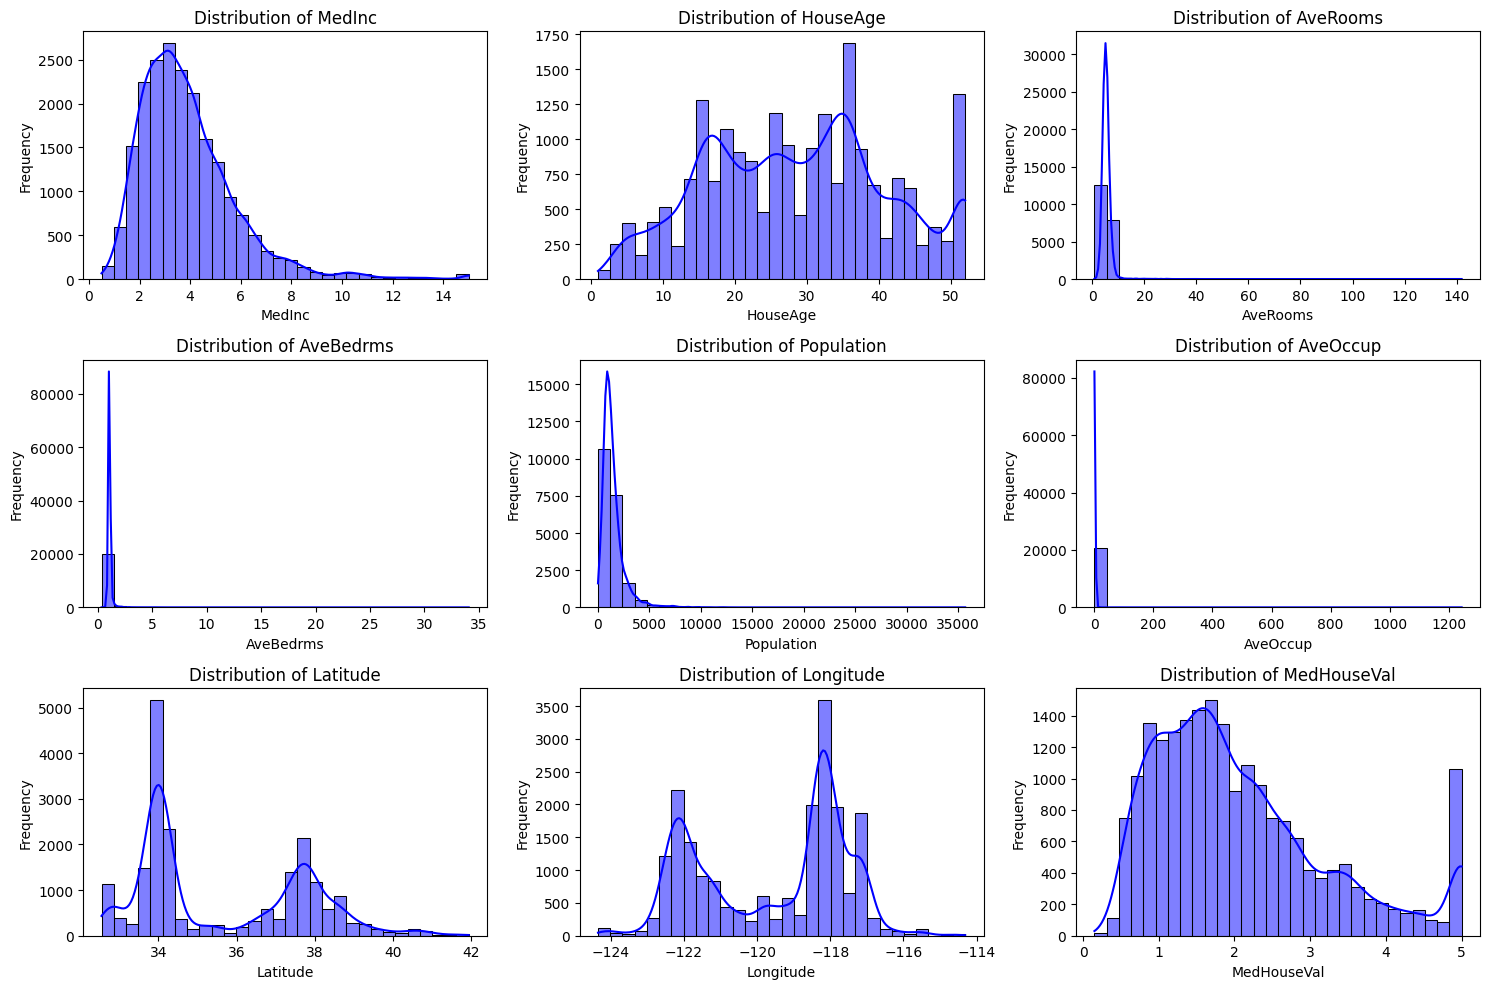

In [22]:
plt.figure(figsize=(15, 10))
for i , feature in enumerate(numerical_features):
    plt.subplot(3,3, i+1)
    sns.histplot(housing_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

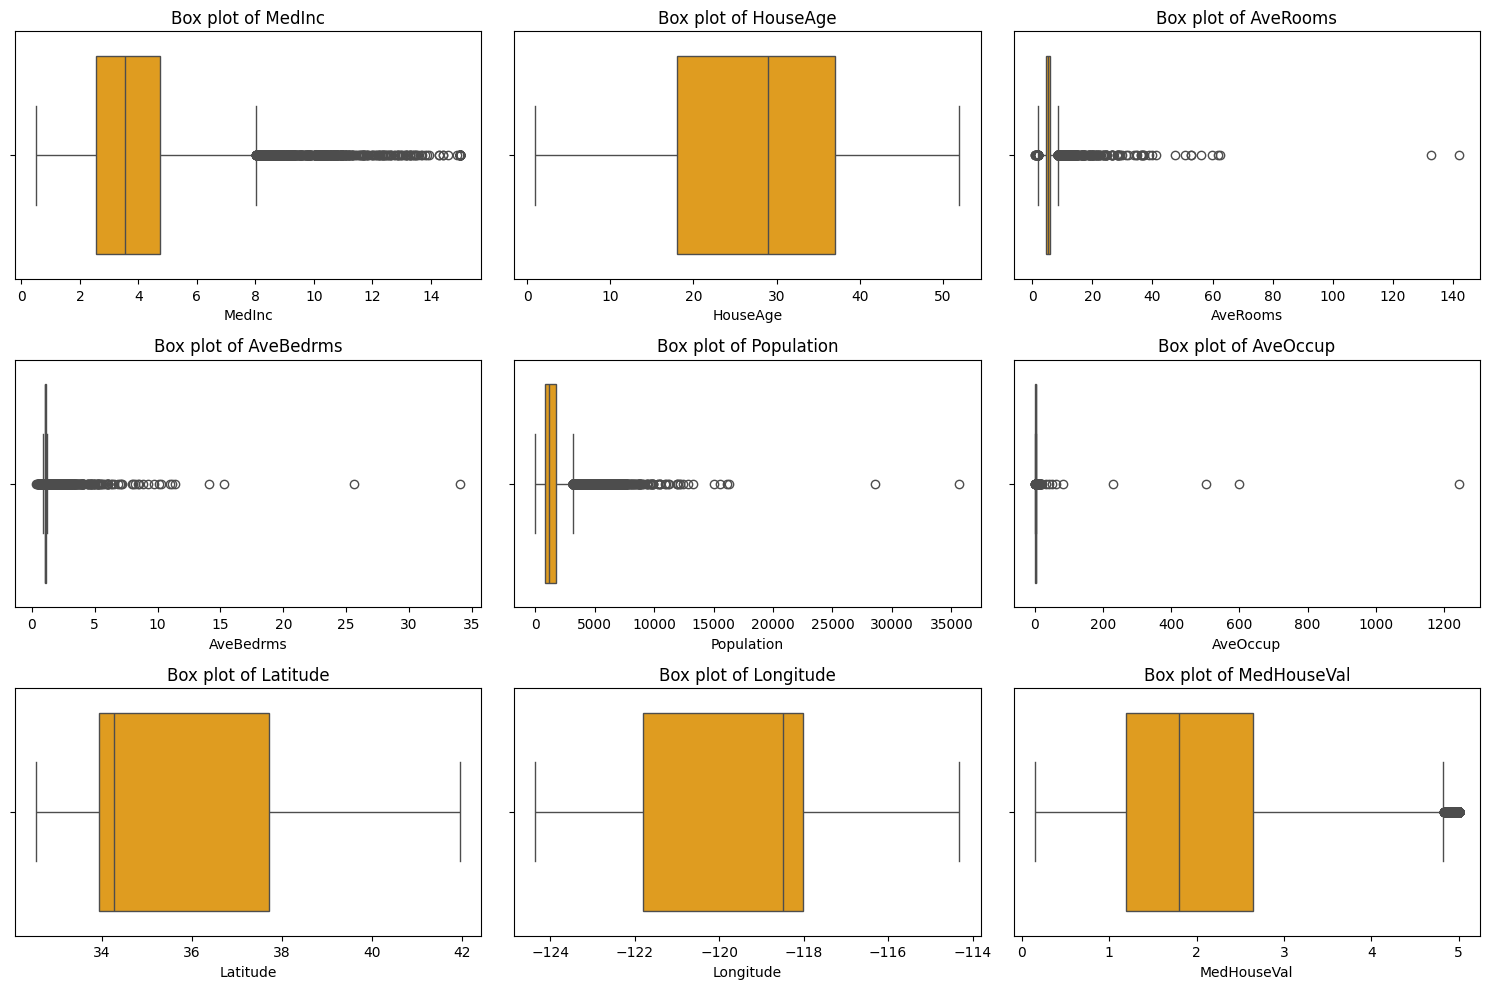

In [6]:
plt.figure(figsize=(15, 10))
for i , feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=housing_df[feature],color='orange')
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


In [11]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
print("outlier detection:\n","-"*30)
outliers_summary={}
for feature in numerical_features:
    q1=housing_df[feature].quantile(0.25)
    q3=housing_df[feature].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=housing_df[(housing_df[feature]<lower_bound)| (housing_df[feature]>upper_bound)]
    outliers_summary[feature]=len(outliers)
    print(f"{feature}: {len(outliers)} outliers")

outlier detection:
 ------------------------------
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers
